In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


Loading the Dataset

In [7]:
customer_dataset=pd.read_csv('./dataset/olist_customers_dataset.csv')
geolocation_dataset=pd.read_csv('./dataset/olist_geolocation_dataset.csv')
order_items_dataset=pd.read_csv('./dataset/olist_order_items_dataset.csv')
orders_payments_dataset=pd.read_csv('./dataset/olist_order_payments_dataset.csv')
orders_reviews_dataset=pd.read_csv('./dataset/olist_order_reviews_dataset.csv')
olist_orders_dataset=pd.read_csv('./dataset/olist_orders_dataset.csv')
olist_product_dataset=pd.read_csv('./dataset/olist_products_dataset.csv')
olist_sellers_dataset=pd.read_csv('./dataset/olist_sellers_dataset.csv')
product_category_dataset=pd.read_csv('./dataset/product_category_name_translation.csv')


**Assessing Data**

Assess the customers table

In [11]:
#checking the summary of the dataset and its columns 
customer_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
#check the missing value in the table customers 
customer_dataset.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [13]:
#checking the duplicate value in the table customer_dataset
duplicate_value=customer_dataset.duplicated()
print(f"Total duplicate value",duplicate_value.sum())

Total duplicate value 0


In [14]:
customer_dataset.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**ASSESS THE ORDER TABLE**


In [16]:
olist_orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [17]:
#checking the missing value in the table olist_orders_dataset
olist_orders_dataset.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [18]:
#check for the duplicate value in the table olist_orders_dataset
duplicate_value=olist_orders_dataset.duplicated()
print(f"Total duplicate value",duplicate_value.sum())

Total duplicate value 0


**ASSESS THE ORDER_ITEMS TABLE**

In [19]:
order_items_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [20]:
order_items_dataset.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [21]:
duplicate_value=order_items_dataset.duplicated()
print(f"Total duplicate value",duplicate_value.sum())

Total duplicate value 0


In [23]:
#check the duplicate value in the order lines 
order_lines_duplicate=order_items_dataset.duplicated(subset=['order_id','product_id']).sum()
print(f"Total duplicate value in the order lines",order_lines_duplicate)

Total duplicate value in the order lines 10225


In [24]:
order_items_dataset.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [43]:
# the item that have the highest freight value 
print(order_items_dataset.iloc[order_items_dataset['freight_value'].idxmax()])
order_items_dataset.head()

order_id               a77e1550db865202c56b19ddc6dc4d53
order_item_id                                         1
product_id             ec31d2a17b299511e7c8627be9337b9b
seller_id              257e61d3251fb5efb9daadddbc2cf7ca
shipping_limit_date                 2018-04-25 06:55:13
price                                             979.0
freight_value                                    409.68
Name: 73486, dtype: object


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


<Axes: ylabel='price'>

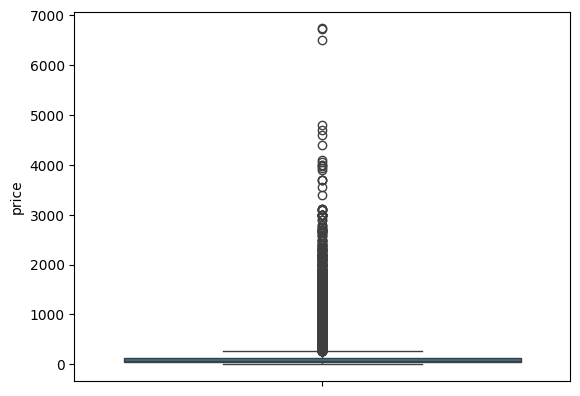

In [ ]:
sns.boxplot(order_items_dataset['price'])
# this shows most of the purchase item lie between the range of 0-5000

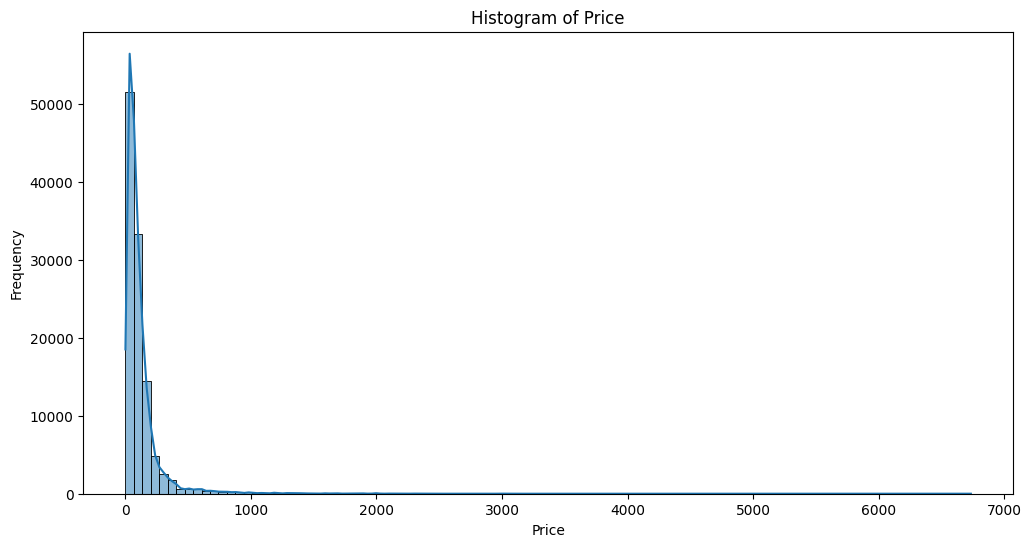

In [ ]:
#plot the histogram of the attribute price 
plt.figure(figsize=(12,6))
sns.histplot(order_items_dataset['price'],bins=100,kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()


In [51]:
#finding the price with maximum frequency(mode)
mode_price=order_items_dataset['price'].mode()[0]
print(f"price with the highest frequency is {mode_price}")


price with the highest frequency is 59.9


In [53]:
median_price=order_items_dataset['price'].median()
print(f"median price of the item is {median_price}")

median price of the item is 74.99


In [46]:
#finding the range with the highest frequency
counts,bins=np.histogram(order_items_dataset['price'],bins=100)
max_freq_index=np.argmax(counts)
print(f"Range with the highest frequency is {bins[max_freq_index]}-{bins[max_freq_index+1]}")


Range with the highest frequency is 0.85-68.19149999999999


<Axes: ylabel='freight_value'>

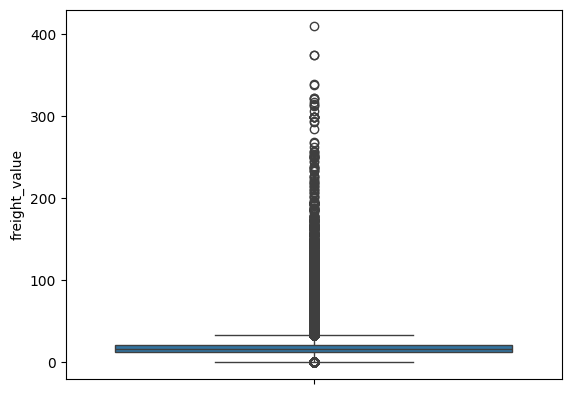

In [47]:
#plotting the boxplot of the feature freight_value
sns.boxplot(order_items_dataset['freight_value'])


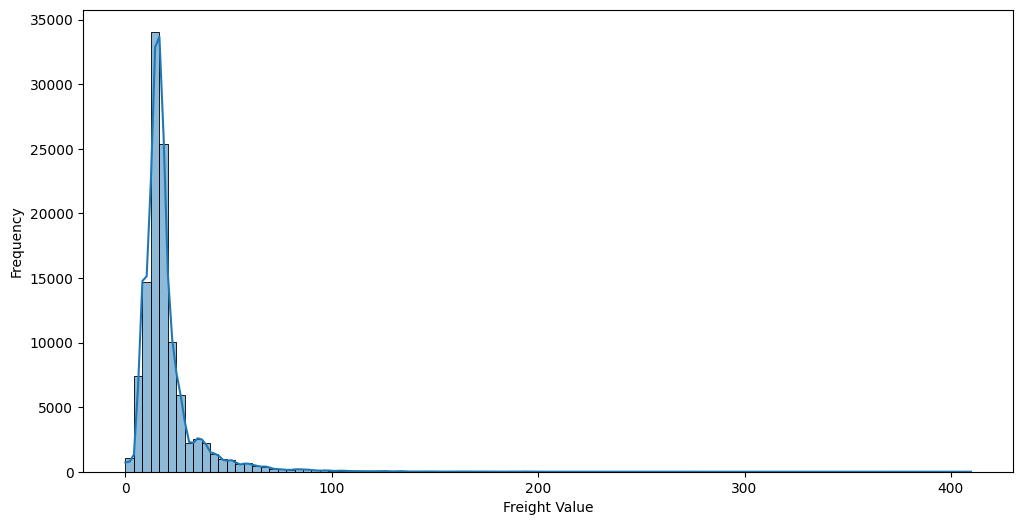

In [48]:
#plotting the histogram of the feature freight_value
plt.figure(figsize=(12,6))
sns.histplot(order_items_dataset['freight_value'],bins=100,kde=True)
plt.xlabel('Freight Value')
plt.ylabel('Frequency')
plt.show()

In [49]:
#finding the mode of the feature freight_value
mode_freight_value=order_items_dataset['freight_value'].mode()[0]
print(mode_freight_value)

15.1


In [50]:
#finding the mediam for the feature freight_value
median_freight_value=order_items_dataset['freight_value'].median()
print(median_freight_value)

16.26


Assessing the Order Payment table

In [54]:
orders_payments_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [55]:
#check the mssing value in the order_payments_dataset
orders_payments_dataset.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [56]:
#check the duplicate value in the order_payments_dataset
duplicate_value=orders_payments_dataset.duplicated()
print(f"Total duplicate value",duplicate_value.sum())

Total duplicate value 0


In [58]:
orders_payments_dataset.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


<Axes: xlabel='payment_value'>

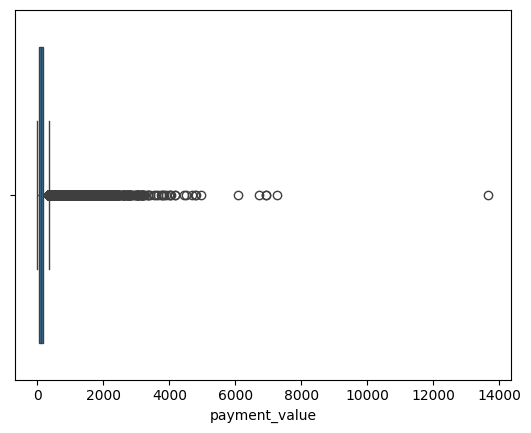

In [87]:
sns.boxplot(x=orders_payments_dataset['payment_value'])

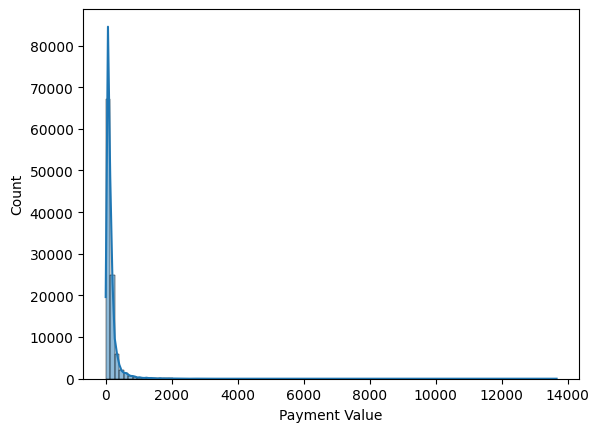

In [60]:
sns.histplot(orders_payments_dataset['payment_value'],bins=100,kde=True)
plt.xlabel('Payment Value')
plt.show()

In [61]:
#mode and median of the payment value
mode_payment_value=orders_payments_dataset['payment_value'].mode()[0]
print(f"mode of the payment value is {mode_payment_value}")
median_payment_value=orders_payments_dataset['payment_value'].median()
print(f"median of the payment value is {median_payment_value}")

mode of the payment value is 50.0
median of the payment value is 100.0


Assessing the order review table 

In [62]:
orders_reviews_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [63]:
#checking the missing values in the table_order_reviews
orders_reviews_dataset.isnull().sum().sort_values(ascending=False)


review_comment_title       87656
review_comment_message     58247
review_id                      0
review_score                   0
order_id                       0
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [64]:
duplicate_value=orders_reviews_dataset.duplicated()
print(f"Total duplicate value",duplicate_value.sum())

Total duplicate value 0


In [65]:
orders_reviews_dataset.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


- Assess the product table

In [67]:
olist_product_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [69]:
olist_product_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [70]:
#finding the sum of null values
olist_product_dataset.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [71]:
#checking the duplicates value 
duplicate_value=olist_product_dataset.duplicated()
print(f"Total duplicate value",duplicate_value.sum())

Total duplicate value 0


In [77]:
#checking the name length of the product contains decimal value or not because it is in float64 we will convert to integer
olist_product_dataset['product_name_lenght'].apply(lambda x:x!=round(x) if pd.notnull(x) else False).any()

np.False_

In [78]:
olist_product_dataset["product_description_lenght"].apply(
    lambda x: x != round(x) if pd.notnull(x) else False
).any()

np.False_

In [80]:
# Check the decimal values in the attribute product_photos_qty
olist_product_dataset["product_photos_qty"].apply(
    lambda x: x != round(x) if pd.notnull(x) else False
).any()


np.False_

In [81]:
olist_product_dataset["product_weight_g"].apply(
    lambda x: x != round(x) if pd.notnull(x) else False
).any()

np.False_

In [82]:
olist_product_dataset["product_length_cm"].apply(
    lambda x: x != round(x) if pd.notnull(x) else False
).any()

np.False_

In [83]:
olist_product_dataset["product_height_cm"].apply(
    lambda x: x != round(x) if pd.notnull(x) else False
).any()

np.False_

In [84]:
olist_product_dataset["product_width_cm"].apply(
    lambda x: x != round(x) if pd.notnull(x) else False
).any()

np.False_

In [85]:
#checking the duplicates 
duplicate_value=olist_product_dataset.duplicated()
print(f"Total duplicate value",duplicate_value.sum())

Total duplicate value 0


In [86]:
olist_product_dataset.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Assess the product_category table**

In [88]:
product_category_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [89]:
product_category_dataset.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [90]:
#checking the missing value in the table product_category_name
product_category_dataset.isnull().sum().sort_values(ascending=False)


product_category_name            0
product_category_name_english    0
dtype: int64

In [91]:
duplicate_value=product_category_dataset.duplicated()
print(f"Total duplicate value:{duplicate_value.sum()}")

Total duplicate value:0


Assess the sellers table 

In [92]:
olist_sellers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Assess the geolocation table 

In [93]:
geolocation_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [94]:
geolocation_dataset.isnull().sum().sort_values(ascending=False)


geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [95]:
duplicate_value=geolocation_dataset.duplicated()
print(f"total duplicate value:{duplicate_value.sum()}")

total duplicate value:261831


**Cleaning the data**

Handling format data type


In [97]:

# Change the customer_zip_code_prefix attribute to string
customer_dataset["customer_zip_code_prefix"] = customer_dataset[
    "customer_zip_code_prefix"
].astype(str)
#doing this because generally zip code is in str format not in integer format 


**Cleaning the orders table**


Handling format datatype 


In [107]:
def convert_to_datetime(dataFrame, columns):
    for column in columns:
        dataFrame[column] = pd.to_datetime(dataFrame[column]).dt.date

In [ ]:

convert_to_datetime(
    olist_orders_dataset,
    [
        "order_purchase_timestamp",
        "order_delivered_customer_date",
        "order_estimated_delivery_date"
    ]
)


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')


In [110]:
#orders placed according to the timestamp
olist_orders_dataset.sort_values(by=['order_purchase_timestamp'],inplace=True)

**HANDLING THE MISSING VALUES**

In [114]:
missing_percentage_per_col=olist_orders_dataset.isnull().mean()*100
missing_percentage_per_col.sort_values(ascending=False)

order_delivered_customer_date    2.981668
order_delivered_carrier_date     1.793023
order_approved_at                0.160899
order_id                         0.000000
order_purchase_timestamp         0.000000
order_status                     0.000000
customer_id                      0.000000
order_estimated_delivery_date    0.000000
dtype: float64

In [115]:
olist_orders_dataset.drop(olist_orders_dataset.index[:3], inplace=True)

In [116]:
olist_orders_dataset["order_delivered_customer_date"] = olist_orders_dataset[
    "order_delivered_customer_date"
].ffill()

In [117]:
olist_orders_dataset['date_ordinal']=olist_orders_dataset['order_purchase_timestamp'].apply(lambda x:x.toordinal())

- Difference between estimated delivery date and true delivery date (shipping_time_delta)
- Difference between order date and delivery date (shipping_duration)
- Difference between order date and estimated delivery date (estimated_duration)

In [121]:

convert_to_datetime(
    olist_orders_dataset,
    [
        "order_estimated_delivery_date",
        "order_delivered_customer_date",
        "order_purchase_timestamp"
    ]
)


In [122]:
olist_orders_dataset["shipping_time"] = (
    olist_orders_dataset["order_estimated_delivery_date"]
    - olist_orders_dataset["order_delivered_customer_date"]
)

# Create shipping duration column, which is the difference between the order delivered customer date and the order purchase timestamp
olist_orders_dataset["shipping_duration"] = (
    olist_orders_dataset["order_delivered_customer_date"] - olist_orders_dataset["order_purchase_timestamp"]
)

# Create estimated duration column, which is the difference between the order estimated delivery date and the order purchase timestamp
olist_orders_dataset["estimated_duration"] = (
    olist_orders_dataset["order_estimated_delivery_date"] - olist_orders_dataset["order_purchase_timestamp"]
)

In [123]:
#checking if there are repeating orders
print(f"Number of unique orders:{olist_orders_dataset['order_id'].nunique()}")
print(f"Number of rows in the dataset:{olist_orders_dataset.shape[0]}")

Number of unique orders:99438
Number of rows in the dataset:99438


Cleaning the order items table 

Handling format data type

In [125]:
order_items_dataset['order_item_id']=order_items_dataset['order_item_id'].astype(str)


Handling Outliers

In [126]:
#checking the statistics of the price attribute before removing outliers
order_items_dataset['price'].describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

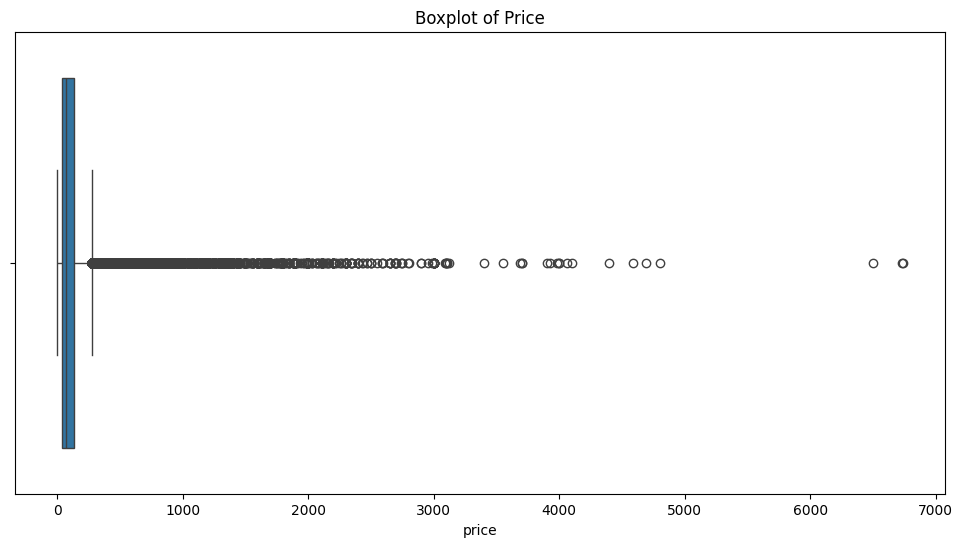

In [129]:
#plot a boxplot to visualize the outliers
plt.figure(figsize=(12,6))
sns.boxplot(x=order_items_dataset['price'])
plt.title('Boxplot of Price')
plt.show()


<Axes: xlabel='price', ylabel='Count'>

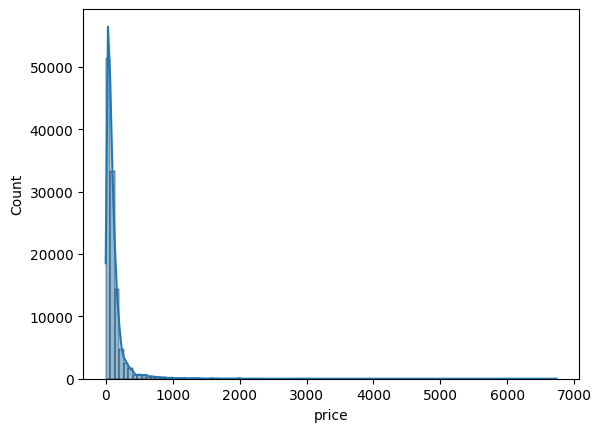

In [130]:
sns.histplot(order_items_dataset['price'],bins=100,kde=True)

In [135]:
# now i am using the iqr method to remove the outliers because the data is positively skewed
def removing_outlier_iqr(dataframe,column):
    Q1=dataframe[column].quantile(0.25)
    Q3=dataframe[column].quantile(0.75)
    IQR=Q3-Q1
    Lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    dataframe=dataframe[(dataframe[column]>Lower_bound) & (dataframe[column]<upper_bound)]
    return dataframe

order_items_dataset=removing_outlier_iqr(order_items_dataset,'price')


<Axes: xlabel='price', ylabel='Count'>

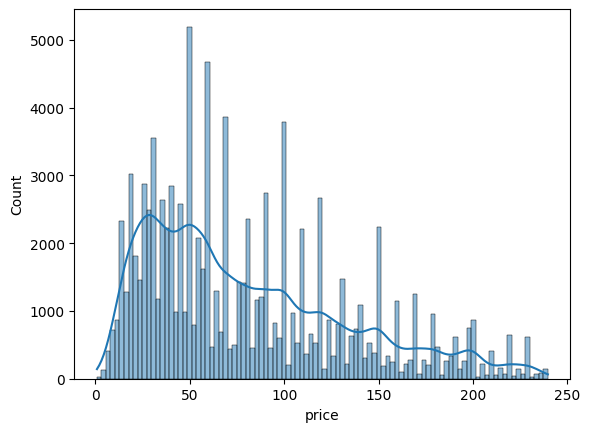

In [136]:
#after removing the outlier
sns.histplot(order_items_dataset['price'],bins=100,kde=True)

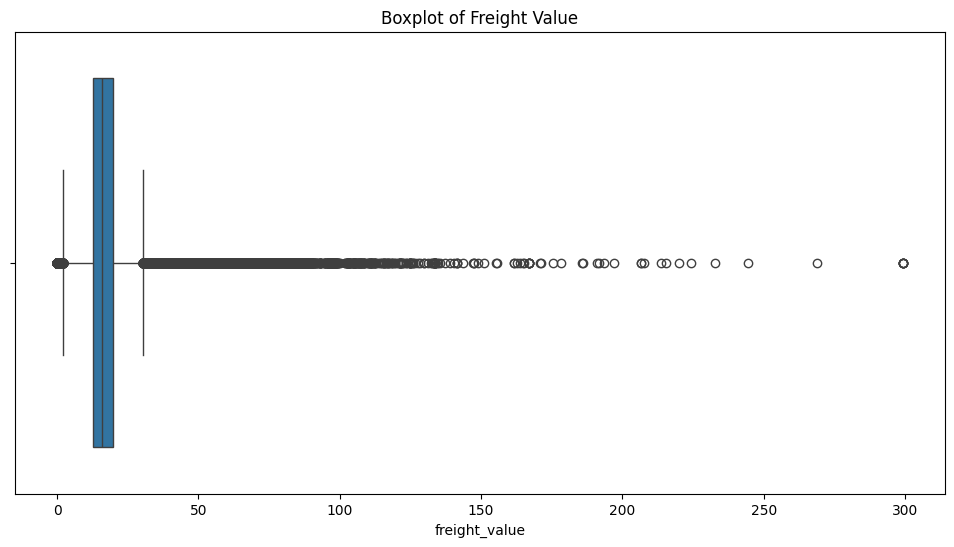

In [133]:
#handling outliers of the freight value attribute 
#handling outliers of the freight value attribute
#calculate q1,q3 and iqr
plt.figure(figsize=(12,6))
sns.boxplot(x=order_items_dataset['freight_value'])
plt.title('Boxplot of Freight Value')
plt.show()

In [138]:
order_items_dataset=removing_outlier_iqr(order_items_dataset,'freight_value')


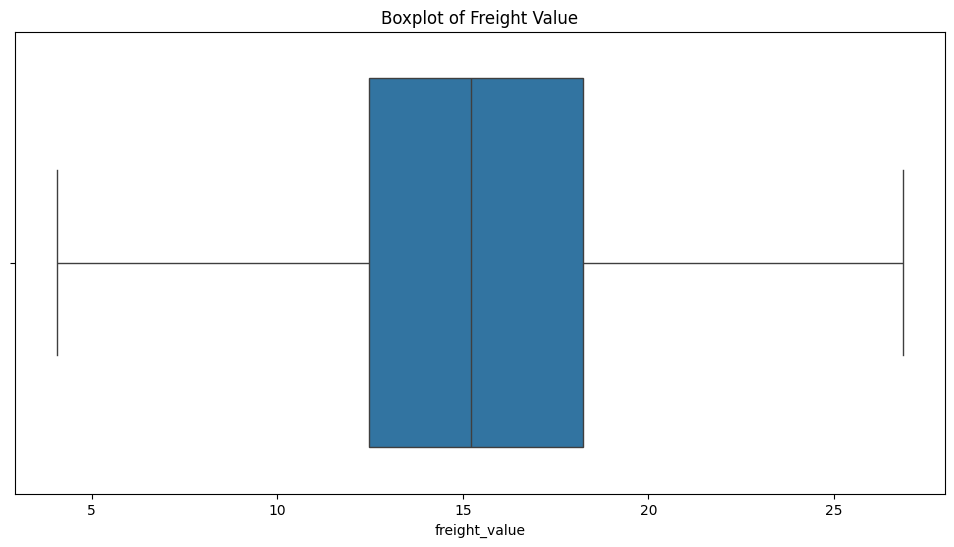

In [139]:
plt.figure(figsize=(12,6))
sns.boxplot(x=order_items_dataset['freight_value'])
plt.title('Boxplot of Freight Value')
plt.show()

(array([  35.,   61.,   43.,   24.,   34.,   36.,   32.,   41.,   44.,
          31.,   41.,   60.,   19.,   45., 2052.,  851., 3262.,  683.,
        1190.,  436., 1474., 1054.,  855., 1348.,  460.,  396.,  303.,
         115.,  140.,   82.,  904.,  536.,  294.,  948., 2777.,  761.,
         966., 1284., 2125., 1181.,  999., 1668., 1478.,  886., 3231.,
        1762.,  942.,  731., 6349., 2105., 1532., 1428., 2439., 1809.,
        1029., 2095., 1161., 1331.,  692., 2331., 1890., 1363., 3416.,
        1261., 1017.,  975., 1057., 1052.,  847.,  723.,  480.,  328.,
         300.,  501.,  905.,  612.,  532.,  349.,  532.,  552.,  305.,
         340.,  638.,  683.,  837.,  567.,  394.,  331.,  184.,  156.,
         178.,  382.,  284.,  260.,  667.,  289.,  196.,  239.,  257.,
         228.]),
 array([ 4.07  ,  4.2978,  4.5256,  4.7534,  4.9812,  5.209 ,  5.4368,
         5.6646,  5.8924,  6.1202,  6.348 ,  6.5758,  6.8036,  7.0314,
         7.2592,  7.487 ,  7.7148,  7.9426,  8.1704,  8.3982

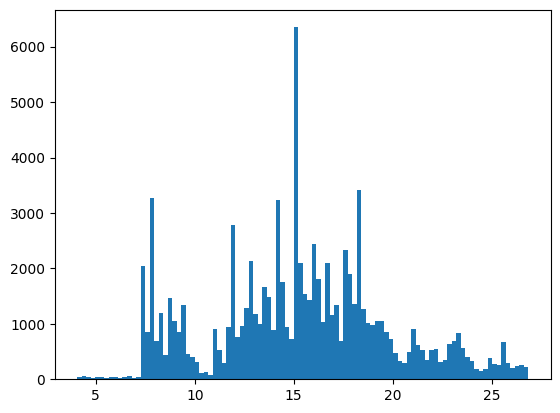

In [140]:
plt.hist(order_items_dataset['freight_value'],bins=100)

Transform the order_item_id into qty to extract unit-per-order line profile

In [144]:
order_items_consolidated_df = (
    order_items_dataset.groupby(by=["product_id", "order_id"])
    .agg(
        {
            "order_item_id": "count",
            "seller_id": "first",
            "shipping_limit_date": "first",
            "price": "first",
            "freight_value": "first",
        }
    )
    
).reset_index()

order_items_consolidated_df


,product_id,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,00066f42aeeb9f3007548bb9d3f33c38,f30149f4a8882a08895b6a242aa0d612,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-05-24 18:58:59,101.65,18.59
1,00088930e925c41fd95ebfe695fd2655,f5eda0ded77c1293b04c953138c8331d,1,7142540dd4c91e2237acb7e911c4eba2,2017-12-18 19:32:19,129.90,13.93
2,0009406fd7479715e4bef61dd91f2462,0bf736fd0fd5169d60de3699fcbcf986,1,4a3ca9315b744ce9f8e9374361493884,2017-12-29 16:12:36,229.00,13.10
3,000b8f95fcb9e0096488278317764d19,3aba44d8e554ab4bb8c09f6f78032ca8,1,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-16 13:35:21,58.90,19.60
4,000b8f95fcb9e0096488278317764d19,6f0dfb5b5398b271cc6bbd9ee263530e,1,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-07 22:15:19,58.90,19.60
...,...,...,...,...,...,...,...
80607,fffdb2d0ec8d6a61f0a0a0db3f25b441,2878b4e373a9556df9aa1708a4e5c3c8,1,9f505651f4a6abe901a56cdc21508025,2018-08-09 16:55:38,34.99,7.51
80608,fffdb2d0ec8d6a61f0a0a0db3f25b441,a8159270bc9cf7d54450e079ba6b7232,1,9f505651f4a6abe901a56cdc21508025,2018-04-09 05:35:27,29.99,18.23
80609,fffdb2d0ec8d6a61f0a0a0db3f25b441,beaf95465b542dea76df78b2fb86a97a,1,9f505651f4a6abe901a56cdc21508025,2018-04-25 10:30:35,34.99,18.23
80610,fffdb2d0ec8d6a61f0a0a0db3f25b441,d6c1ed12e8eeaa15e9d5c83c79598f85,1,9f505651f4a6abe901a56cdc21508025,2018-08-14 17:25:18,34.99,7.51


In [ ]:
order_items_consolidated_df

,product_id,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,00066f42aeeb9f3007548bb9d3f33c38,f30149f4a8882a08895b6a242aa0d612,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-05-24 18:58:59,101.65,18.59
1,00088930e925c41fd95ebfe695fd2655,f5eda0ded77c1293b04c953138c8331d,1,7142540dd4c91e2237acb7e911c4eba2,2017-12-18 19:32:19,129.90,13.93
2,0009406fd7479715e4bef61dd91f2462,0bf736fd0fd5169d60de3699fcbcf986,1,4a3ca9315b744ce9f8e9374361493884,2017-12-29 16:12:36,229.00,13.10
3,000b8f95fcb9e0096488278317764d19,3aba44d8e554ab4bb8c09f6f78032ca8,1,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-16 13:35:21,58.90,19.60
4,000b8f95fcb9e0096488278317764d19,6f0dfb5b5398b271cc6bbd9ee263530e,1,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-07 22:15:19,58.90,19.60
...,...,...,...,...,...,...,...
80607,fffdb2d0ec8d6a61f0a0a0db3f25b441,2878b4e373a9556df9aa1708a4e5c3c8,1,9f505651f4a6abe901a56cdc21508025,2018-08-09 16:55:38,34.99,7.51
80608,fffdb2d0ec8d6a61f0a0a0db3f25b441,a8159270bc9cf7d54450e079ba6b7232,1,9f505651f4a6abe901a56cdc21508025,2018-04-09 05:35:27,29.99,18.23
80609,fffdb2d0ec8d6a61f0a0a0db3f25b441,beaf95465b542dea76df78b2fb86a97a,1,9f505651f4a6abe901a56cdc21508025,2018-04-25 10:30:35,34.99,18.23
80610,fffdb2d0ec8d6a61f0a0a0db3f25b441,d6c1ed12e8eeaa15e9d5c83c79598f85,1,9f505651f4a6abe901a56cdc21508025,2018-08-14 17:25:18,34.99,7.51


In [149]:
print(f"Orders in new table: {order_items_consolidated_df['order_id'].nunique()}")
print(f"Orders in old table: {order_items_dataset['order_id'].nunique()}")
print(f"SKUs in new table: {order_items_consolidated_df['product_id'].nunique()}")
print(f"SKUs in old table: {order_items_dataset['product_id'].nunique()}")
print(
    f"Total quantity in new table: {order_items_consolidated_df['order_item_id'].sum()}"
)
print(f"Total quantity in old table: {len(order_items_dataset['order_item_id'])}")

Orders in new table: 78106
Orders in old table: 78106
SKUs in new table: 26088
SKUs in old table: 26088
Total quantity in new table: 89128
Total quantity in old table: 89128


In [150]:
order_items_consolidated_df.rename(columns={"order_item_id":"qty"},inplace=True)
order_items_consolidated_df

,product_id,order_id,qty,seller_id,shipping_limit_date,price,freight_value
0,00066f42aeeb9f3007548bb9d3f33c38,f30149f4a8882a08895b6a242aa0d612,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-05-24 18:58:59,101.65,18.59
1,00088930e925c41fd95ebfe695fd2655,f5eda0ded77c1293b04c953138c8331d,1,7142540dd4c91e2237acb7e911c4eba2,2017-12-18 19:32:19,129.90,13.93
2,0009406fd7479715e4bef61dd91f2462,0bf736fd0fd5169d60de3699fcbcf986,1,4a3ca9315b744ce9f8e9374361493884,2017-12-29 16:12:36,229.00,13.10
3,000b8f95fcb9e0096488278317764d19,3aba44d8e554ab4bb8c09f6f78032ca8,1,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-16 13:35:21,58.90,19.60
4,000b8f95fcb9e0096488278317764d19,6f0dfb5b5398b271cc6bbd9ee263530e,1,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-07 22:15:19,58.90,19.60
...,...,...,...,...,...,...,...
80607,fffdb2d0ec8d6a61f0a0a0db3f25b441,2878b4e373a9556df9aa1708a4e5c3c8,1,9f505651f4a6abe901a56cdc21508025,2018-08-09 16:55:38,34.99,7.51
80608,fffdb2d0ec8d6a61f0a0a0db3f25b441,a8159270bc9cf7d54450e079ba6b7232,1,9f505651f4a6abe901a56cdc21508025,2018-04-09 05:35:27,29.99,18.23
80609,fffdb2d0ec8d6a61f0a0a0db3f25b441,beaf95465b542dea76df78b2fb86a97a,1,9f505651f4a6abe901a56cdc21508025,2018-04-25 10:30:35,34.99,18.23
80610,fffdb2d0ec8d6a61f0a0a0db3f25b441,d6c1ed12e8eeaa15e9d5c83c79598f85,1,9f505651f4a6abe901a56cdc21508025,2018-08-14 17:25:18,34.99,7.51


Change the order payment table
1.removing the outlier 

Cleaning the order payment table 